In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [28]:
np.random.seed(42)

def f(x):
    return -x ** 4 * np.cos(x)

In [29]:
x = np.linspace(0,10,100)
print(x.shape)
x = x.reshape(-1,1)
y = f(x)
print(x.shape, y.shape)

x_train = (np.random.rand(100) *10).reshape(-1,1)
y_train = f(x_train) + np.random.normal(loc=10.0, scale=2.0)
print(x_train.shape, y_train.shape)

(100,)
(100, 1) (100, 1)
(100, 1) (100, 1)


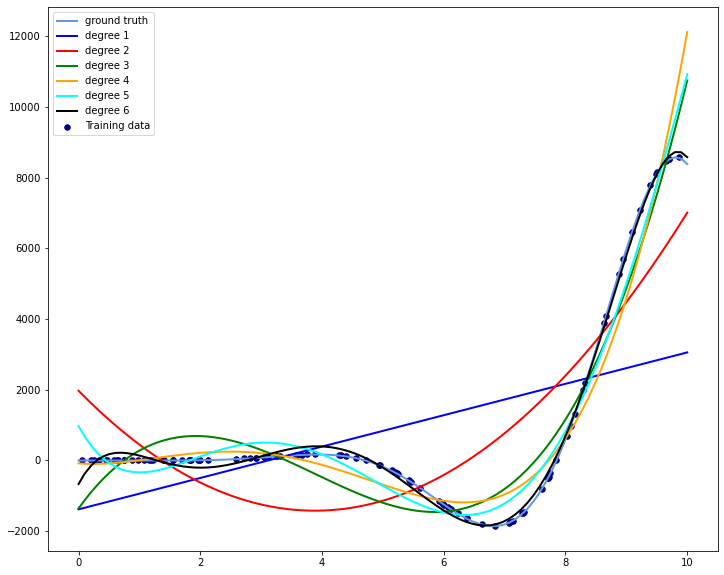

In [39]:
fig = plt.figure(figsize=(12,10))
plt.plot(x,y, color="cornflowerblue", linewidth=2, label="ground truth")
plt.scatter(x_train, y_train, color="navy", s=30, marker="o", label="Training data")

colors = ["blue", "red", "green", "orange", "cyan", "black"]
degree_list = [1,2,3,4,5,6]
for idx, degree in enumerate(degree_list):
    pf = PolynomialFeatures(degree)
    pf.fit(x_train)
    x_train_transformed = pf.transform(x_train)
    poly_regr = LinearRegression()
    poly_regr.fit(x_train_transformed, y_train)

    x_transformed = pf.transform(x)
    y_pred = poly_regr.predict(x_transformed)
    plt.plot(x, y_pred, color=colors[idx], linewidth=2, label=f"degree {degree}")

plt.legend()
plt.show()